# Restaurant Recommendation System

##### Team: Deepak Mysuru Heeranna, Vinayaka Manjunatha Malya, Teja Diwan, Pruthvi Raj Hogenakalli

## Libraries Used 

In [1]:
import pandas as pd
import numpy as np
import ast
import re
import math
import folium
import matplotlib.pyplot as plt
import seaborn as  sns
import plotly.graph_objs as go
import chart_studio.plotly as py
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import sklearn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from matplotlib.pyplot import rcParams
from nltk.tokenize import word_tokenize
from plotly.offline import init_notebook_mode, plot, iplot
from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML 
from folium.plugins import FloatImage
rcParams['figure.figsize'] = 10, 6
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:85% !important; }</style"))

from subprocess import check_output
from wordcloud import WordCloud

init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
Cleaning_df = pd.read_csv(r"C:/Users/Vinnu/Desktop/BigData/zomato.csv", encoding='utf-8')

In [3]:
Cleaning_df.shape

(51717, 17)

## Data Cleaning 

In [4]:
cleaned=Cleaning_df.drop_duplicates('url')
# cleaned=cleaned.dropna()

In [5]:
cleaned.shape

(51717, 17)

###### All URLs' are unique and there are no duplicates 

In [6]:
cleaned.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Checking for Null values in the columns 

In [7]:
cleaned['url'].isnull().sum()

0

In [8]:
cleaned['address'].isnull().sum()

0

In [9]:
cleaned['name'].isnull().sum()

0

In [10]:
cleaned['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
cleaned['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
cleaned['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
cleaned['rate'].replace(np.nan, '', regex=True, inplace=True)
cleaned['rate'].replace('-', '', regex=True, inplace=True)

In [14]:
cleaned['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
cleaned['rate'].isnull().sum()

0

In [16]:
cleaned['votes'].isnull().sum()

0

In [17]:
cleaned[~cleaned['phone'].str.contains('[0-9+]',  na=False)]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
121,https://www.zomato.com/bangalore/new-mangalore...,"89, Near PES College, 22nd Main Road, Girinaga...",New Mangalore Lunch Home,No,No,3.3/5,7,NaN,Banashankari,Quick Bites,NaN,"Mangalorean, South Indian, North Indian",200,[],[],Delivery,Banashankari
234,https://www.zomato.com/bangalore/kadamba-class...,"Satellite Bus Stand, KSRTC, Mysore Road, Banga...",Kadamba Classic,No,No,3.6/5,16,NaN,Mysore Road,Quick Bites,NaN,South Indian,300,"[('Rated 3.0', 'RATED\n Was on travel mode an...",[],Delivery,Banashankari
300,https://www.zomato.com/bangalore/just-thindi-b...,"27, Gandhi Bazaar Main Rd, Basavanagudi, Banga...",Just Thindi,Yes,No,3.6/5,16,NaN,Basavanagudi,Quick Bites,NaN,South Indian,200,"[('Rated 4.0', 'RATED\n rice bath was good bu...","['Vada', 'Idly [2 Pieces]', 'Masala Dosa', 'Kh...",Delivery,Banashankari
378,https://www.zomato.com/bangalore/dakshin-kitch...,"Kabirmutt Road, Gavipuram Extension, Basavanag...",Dakshin Kitchen,Yes,No,3.6/5,15,NaN,Basavanagudi,Quick Bites,NaN,South Indian,100,"[('Rated 5.0', ""RATED\n What's special here y...",[],Delivery,Banashankari
466,https://www.zomato.com/bangalore/chettys-corne...,"126/3, Uttarahalli Main Road, Sarvabouma Nagar...",Chetty's Corner,Yes,No,3.4/5,30,NaN,Uttarahalli,Quick Bites,NaN,"Fast Food, Burger, Pizza",200,"[('Rated 3.0', 'RATED\n Hi All,\n\nWe ordered...",[],Delivery,Banashankari
467,https://www.zomato.com/bangalore/kapoors-cafe-...,"Bengaluru, Jayanagar, Bangalore",Kapoor's Cafe,Yes,No,4.2/5,150,NaN,Jayanagar,Casual Dining,"Lassi, French Fries, Cheese Balls, Paneer Pako...",North Indian,800,"[('Rated 4.0', ""RATED\n A great Punjabi look ...","['Chole Bhature [2 Pieces]', 'Salted French Fr...",Delivery,Banashankari
681,https://www.zomato.com/bangalore/parama-ruchi-...,"Near NU Hospital Padmanabha Nagar, Banashankar...",Parama Ruchi,No,No,3.5/5,11,NaN,Banashankari,Quick Bites,NaN,"South Indian, North Indian, Chinese, Street Food",300,[],[],Dine-out,Banashankari
683,https://www.zomato.com/bangalore/meat-and-eat-...,"21/22, 24th Main 50 Feet Road, T block, Girina...",Meat And Eat,No,No,3.5/5,12,NaN,Banashankari,Quick Bites,NaN,"Fast Food, Burger",500,[],[],Dine-out,Banashankari
693,https://www.zomato.com/bangalore/hanumanthanag...,"Opposite SVC Bank, Mount Joy Road, Hanumanth N...",Hanumanthanagar Biryani Junction,No,No,3.5/5,17,NaN,Banashankari,Quick Bites,NaN,South Indian,300,"[('Rated 3.0', 'RATED\n This place is located...",[],Dine-out,Banashankari
727,https://www.zomato.com/bangalore/new-mangalore...,"89, Near PES College, 22nd Main Road, Girinaga...",New Mangalore Lunch Home,No,No,3.3/5,7,NaN,Banashankari,Quick Bites,NaN,"Mangalorean, South Indian, North Indian",200,[],[],Dine-out,Banashankari


In [18]:
cleaned[~cleaned['phone'].str.contains('[0-9+]',  na=False)]['phone'].unique()

array([nan], dtype=object)

In [19]:
cleaned['phone'].replace(np.nan, '', regex=True, inplace=True)

In [20]:
cleaned[~cleaned['phone'].str.contains('[0-9+]',  na=False)]['phone'].unique()

array([''], dtype=object)

In [21]:
cleaned[cleaned['phone'].str.contains('\r\n',  na=False)]['phone']

0           080 42297555\r\n+91 9743772233
4         +91 8026612447\r\n+91 9901210005
5         +91 9980040002\r\n+91 9980063005
6           +91 9731716688\r\n080 26740366
7             080 48653961\r\n080 48655715
8         +91 8884135549\r\n+91 9449449316
9         +91 9945230807\r\n+91 9743804471
10          080 26724489\r\n+91 7406048982
15          080 26768182\r\n+91 9845704455
16        +91 9972988038\r\n+91 9900121238
17          080 26711554\r\n+91 9741406338
20        +91 9880016665\r\n+91 8217311687
23          080 65975430\r\n+91 7337733798
29          080 26600704\r\n+91 9342593424
35        +91 7022260661\r\n+91 7022260662
37       00 919663567711\r\n+91 9916326323
41        +91 9243195843\r\n+91 9243404670
42            080 66000666\r\n080 42005285
43             080 26710070\r\n18602100000
44            080 48653961\r\n080 48655715
45        +91 7026677677\r\n+91 7026577577
47        +91 8043755256\r\n+91 9886073774
48            080 28606888\r\n080 28606886
49        +

In [22]:
cleaned['phone'].replace('\r\n', '  ', regex=True, inplace=True)

In [23]:
cleaned[cleaned['phone'].str.contains('\r\n',  na=False)]['phone']

Series([], Name: phone, dtype: object)

In [24]:
cleaned['phone'] = cleaned['phone'].str.replace('[^\+0-9\r\n\s]','')

In [25]:
cleaned['phone'].str.contains('[^\+0-9\r\n\s]',na = False).sum()

0

In [26]:
cleaned.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555 +91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447 +91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [27]:
cleaned['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [28]:
cleaned[cleaned['location'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,,0,,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Bannerghatta Road
9874,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,,0,,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,BTM
13693,https://www.zomato.com/bangalore/mohabbat-desi...,"Chandapura- Anakal Main Road, Oppsite Vemana H...",Mohabbat Desi Restaurant,No,No,,0,,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Electronic City
16351,https://www.zomato.com/bangalore/desi-chatkara...,"Kudlu Gate, Bommanahalli, Bangalore",Desi Chatkara,No,No,,0,,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,HSR
26432,https://www.zomato.com/bangalore/new-taj-birya...,"IB Road, Lorry Stand, Kushaal Nagar, Ward 10, ...",New Taj Biryani Centre,No,No,,0,,NaN,NaN,NaN,NaN,NaN,[],[],Dine-out,Kammanahalli
26519,https://www.zomato.com/bangalore/abs-absolute-...,"Koramangala 8th Block, Bangalore",AB's - Absolute Barbecues,No,No,,0,,NaN,NaN,NaN,NaN,NaN,[],[],Buffet,Koramangala 4th Block
27672,https://www.zomato.com/bangalore/manchow-koram...,"6, Kathalipalya Village, 6th Cross, Koramangal...",Manchow,No,No,,0,,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Koramangala 4th Block
28611,https://www.zomato.com/bangalore/manchow-koram...,"6, Kathalipalya Village, 6th Cross, Koramangal...",Manchow,No,No,,0,,NaN,NaN,NaN,NaN,NaN,[],[],Dine-out,Koramangala 4th Block
29298,https://www.zomato.com/bangalore/abs-absolute-...,"Koramangala 8th Block, Bangalore",AB's - Absolute Barbecues,No,No,,0,,NaN,NaN,NaN,NaN,NaN,[],[],Buffet,Koramangala 5th Block
30604,https://www.zomato.com/bangalore/manchow-koram...,"6, Kathalipalya Village, 6th Cross, Koramangal...",Manchow,No,No,,0,,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Koramangala 5th Block


In [29]:
cleaned['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [30]:
cleaned['location'].nunique()

93

In [31]:
cleaned[cleaned['rest_type'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
999,https://www.zomato.com/bangalore/mughlai-kitch...,"77/2 BDA Road, Opposite RR Layout, BTM 6th Sta...",Mughlai Kitchen,Yes,No,3.5/5,269,+91 9663197947\r +91 9986692090,BTM,NaN,"Momos, Oreo Shake","Mughlai, North Indian, Chinese, Momos",600,"[('Rated 5.0', ""RATED\n Ordered Chicken Kadai...","['Fry Chicken Kabab [5 Pieces]', 'Fry Chicken ...",Delivery,Bannerghatta Road
1300,https://www.zomato.com/bangalore/eat-joy-resta...,"21, Saifee Apartment, 5th Cross, 22nd Main, Ne...",Eat & Joy Restaurant,Yes,No,3.0/5,7,+91 9945052352,JP Nagar,NaN,NaN,"Fast Food, Finger Food",300,"[('Rated 1.0', 'RATED\n I had ordered for one...",[],Delivery,Bannerghatta Road
1376,https://www.zomato.com/bangalore/kababish-rest...,"7th Main, 18th Cross NS Palya, 2nd Stage",Kababish Restaurant,Yes,No,3.6/5,15,+91 8050732123 00 805074123,BTM,NaN,NaN,"North Indian, Chinese, Arabian",700,"[('Rated 2.0', 'RATED\n You would only go to ...",[],Delivery,Bannerghatta Road
1565,https://www.zomato.com/bangalore/goli-vada-pav...,"81/3, Hulimavu Road, Opposite Meenakshi Mall, ...",Goli Vada Pav No 1,No,No,,0,+91 9900561532 +91 8971051846,Bannerghatta Road,NaN,NaN,"Street Food, Burger",150,[],[],Delivery,Bannerghatta Road
1637,https://www.zomato.com/bangalore/ammis-biryani...,"3, 1st Cross, Kalyani Kala Mandir, Bannerghatt...",Ammi's Biryani,No,No,2.4/5,392,+91 9513777152 080 39457777,Bannerghatta Road,NaN,"Chicken Biryani, Hyderabadi Biryani, Rolls, Mu...","Biryani, North Indian",500,"[('Rated 3.0', 'RATED\n If you a spicy biriya...",[],Delivery,Bannerghatta Road
1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,,0,,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Bannerghatta Road
1822,https://www.zomato.com/bangalore/bottle-genie-...,"1260, SY 35/4 SJR Tower's, 7th Phase, 24th Mai...",Bottle Genie,Yes,No,,0,+91 8043334333,JP Nagar,NaN,NaN,Beverages,250,[],[],Delivery,Bannerghatta Road
2023,https://www.zomato.com/bangalore/goli-vada-pav...,"81/3, Hulimavu Road, Opposite Meenakshi Mall, ...",Goli Vada Pav No 1,No,No,,0,+91 9900561532 +91 8971051846,Bannerghatta Road,NaN,NaN,"Street Food, Burger",150,[],[],Dine-out,Bannerghatta Road
2044,https://www.zomato.com/bangalore/ammis-biryani...,"3, 1st Cross, Kalyani Kala Mandir, Bannerghatt...",Ammi's Biryani,No,No,2.4/5,392,+91 9513777152 080 39457777,Bannerghatta Road,NaN,"Chicken Biryani, Hyderabadi Biryani, Rolls, Mu...","Biryani, North Indian",500,"[('Rated 3.0', 'RATED\n If you a spicy biriya...",[],Dine-out,Bannerghatta Road
2330,https://www.zomato.com/bangalore/bottle-genie-...,"1260, SY 35/4 SJR Tower's, 7th Phase, 24th Mai...",Bottle Genie,Yes,No,,0,+91 8043334333,JP Nagar,NaN,NaN,Beverages,250,[],[],Dine-out,Bannerghatta Road


In [32]:
cleaned['rest_type'].replace(np.nan, '', regex=True, inplace=True)
cleaned[cleaned['rest_type'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [33]:
cleaned['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', '', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
       

In [34]:
print("NA Values : ",cleaned['dish_liked'].isnull().sum())

NA Values :  28078


In [35]:
print("NA Values : ",cleaned['cuisines'].isnull().sum())


NA Values :  45


In [36]:
cleaned['cuisines'].replace(np.nan, '', regex=True, inplace=True)

In [37]:
print("NA Values : ",cleaned['cuisines'].isnull().sum())

NA Values :  0


In [38]:
print("NULL values : ",cleaned['approx_cost(for two people)'].isnull().sum())

NULL values :  346


In [39]:
cleaned[~cleaned['approx_cost(for two people)'].str.contains('two people', na=False)].shape

(51717, 17)

In [40]:
cleaned['approx_cost(for two people)'].str.extract(r'(\d?,?\d+)').isnull().sum()

0    346
dtype: int64

In [41]:
cleaned[cleaned['approx_cost(for two people)'].str.extract(r'(\d?,?\d+)').isnull().iloc[:,0]].head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,,0,,NaN,,NaN,,NaN,[],[],Delivery,Bannerghatta Road
1768,https://www.zomato.com/bangalore/innate-jp-nag...,"45, 14th Main, 7th phase, Puttehahalli Palya, ...",Innate,No,No,,0,,JP Nagar,Delivery,NaN,Beverages,NaN,[],[],Delivery,Bannerghatta Road
1795,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,,0,,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Bannerghatta Road
3069,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,,0,,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Basavanagudi
3774,https://www.zomato.com/bangalore/the-hub-ibis-...,"Ibis Bengaluru, Opposite RMZ Ecospace Business...",The Hub - Ibis Bengaluru,No,No,3.9/5,237,,Marathahalli,Bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,NaN,"[('Rated 4.0', 'RATED\n The Hub is a small ba...",[],Buffet,Bellandur


In [42]:
cleaned['approx_cost(for two people)'] = cleaned['approx_cost(for two people)'].str.extract(r'(\d?,?\d+)')

In [43]:
cleaned['approx_cost(for two people)'].isnull().sum()

346

In [44]:
print("NULL values : ",cleaned['reviews_list'].isnull().sum())
print("Blank : ", (cleaned['reviews_list']=="[]").sum())

NULL values :  0
Blank :  7595


In [45]:
cleaned[cleaned['reviews_list']=="[]"].head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NEW,0,+91 8553206035,Banashankari,"Takeaway, Delivery",NaN,"Street Food, Fast Food",500,[],[],Delivery,Banashankari
91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,,0,+91 7829290358,Banashankari,"Takeaway, Delivery",NaN,South Indian,400,[],[],Delivery,Banashankari
92,https://www.zomato.com/bangalore/annapooranesh...,"625, 5th Cross Road, Hanumanthnagar, Banashank...",Annapooraneshwari Mess,No,No,,0,+91 9742009518,Banashankari,Mess,NaN,South Indian,200,[],[],Delivery,Banashankari
95,https://www.zomato.com/bangalore/vi-ras-bar-an...,"3828, Near Deve Gowda Petrol Bunk, 30th Cross,...",Vi Ra's Bar and Restaurant,No,No,3.3/5,62,+91 9845063930 +91 7411148111,Banashankari,Bar,Chilli Chicken,"South Indian, North Indian, Chinese",800,[],[],Delivery,Banashankari
107,https://www.zomato.com/bangalore/coffee-shopee...,"1722, 13th Main Road 31st Cross BSK, 2nd Stage...",Coffee Shopee,No,No,,0,+91 9591504624,Banashankari,"Takeaway, Delivery",NaN,Beverages,250,[],[],Delivery,Banashankari


In [46]:
import ast
cleaned['reviews_list'] =  cleaned['reviews_list'].apply(ast.literal_eval)
cleaned.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555 +91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447 +91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet,Banashankari


In [47]:
cleaned['reviews_list'].apply(len).sum()

1320051

In [48]:
print("NULL values : ",cleaned['menu_item'].isnull().sum())
print("Blank : ", (cleaned['menu_item']=="[]").sum())

NULL values :  0
Blank :  39617


In [49]:
cleaned['menu_item'] = cleaned['menu_item'].apply(ast.literal_eval)
cleaned.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555 +91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447 +91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet,Banashankari


In [50]:
print("NULL values : ",cleaned['listed_in(type)'].isnull().sum())
print("Blank : ", (cleaned['listed_in(type)']=="").sum())

NULL values :  0
Blank :  0


In [51]:
cleaned['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [52]:
cleaned['listed_in(type)'].nunique()

7

In [53]:
print("NULL values : ",cleaned['listed_in(city)'].isnull().sum())
print("Blank : ", (cleaned['listed_in(city)']=="").sum())

NULL values :  0
Blank :  0


In [54]:
cleaned['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [55]:
cleaned['listed_in(city)'].nunique()

30

In [56]:
cleaned.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [57]:
cleaned['online_order'] = cleaned['online_order'].astype('category')
cleaned['book_table'] = cleaned['book_table'].astype('category')
cleaned['location'] = cleaned['location'].astype('category')
cleaned['rest_type'] = cleaned['rest_type'].astype('category')
cleaned['listed_in(type)'] = cleaned['listed_in(type)'].astype('category')
cleaned['listed_in(city)'] = cleaned['listed_in(city)'].astype('category')

In [58]:
cleaned.dtypes

url                              object
address                          object
name                             object
online_order                   category
book_table                     category
rate                             object
votes                             int64
phone                            object
location                       category
rest_type                      category
dish_liked                       object
cuisines                         object
approx_cost(for two people)      object
reviews_list                     object
menu_item                        object
listed_in(type)                category
listed_in(city)                category
dtype: object

In [59]:
#cleaned.to_csv('Clean_Resturant_Data.csv', index=False, encoding='utf-8')

# Exploratory data analysis and Simple Recommendations

In [60]:
# #Unique resturants 
cleaned = cleaned.drop_duplicates(subset=['address', 'name']).reset_index().drop('index', axis=1)

In [61]:
cleaned.shape

(12499, 17)

### Top 100 resturants plot of Bengaluru


In [62]:
histo = cleaned.groupby('name')['address'].count()
histo = histo.sort_values()[-100:]

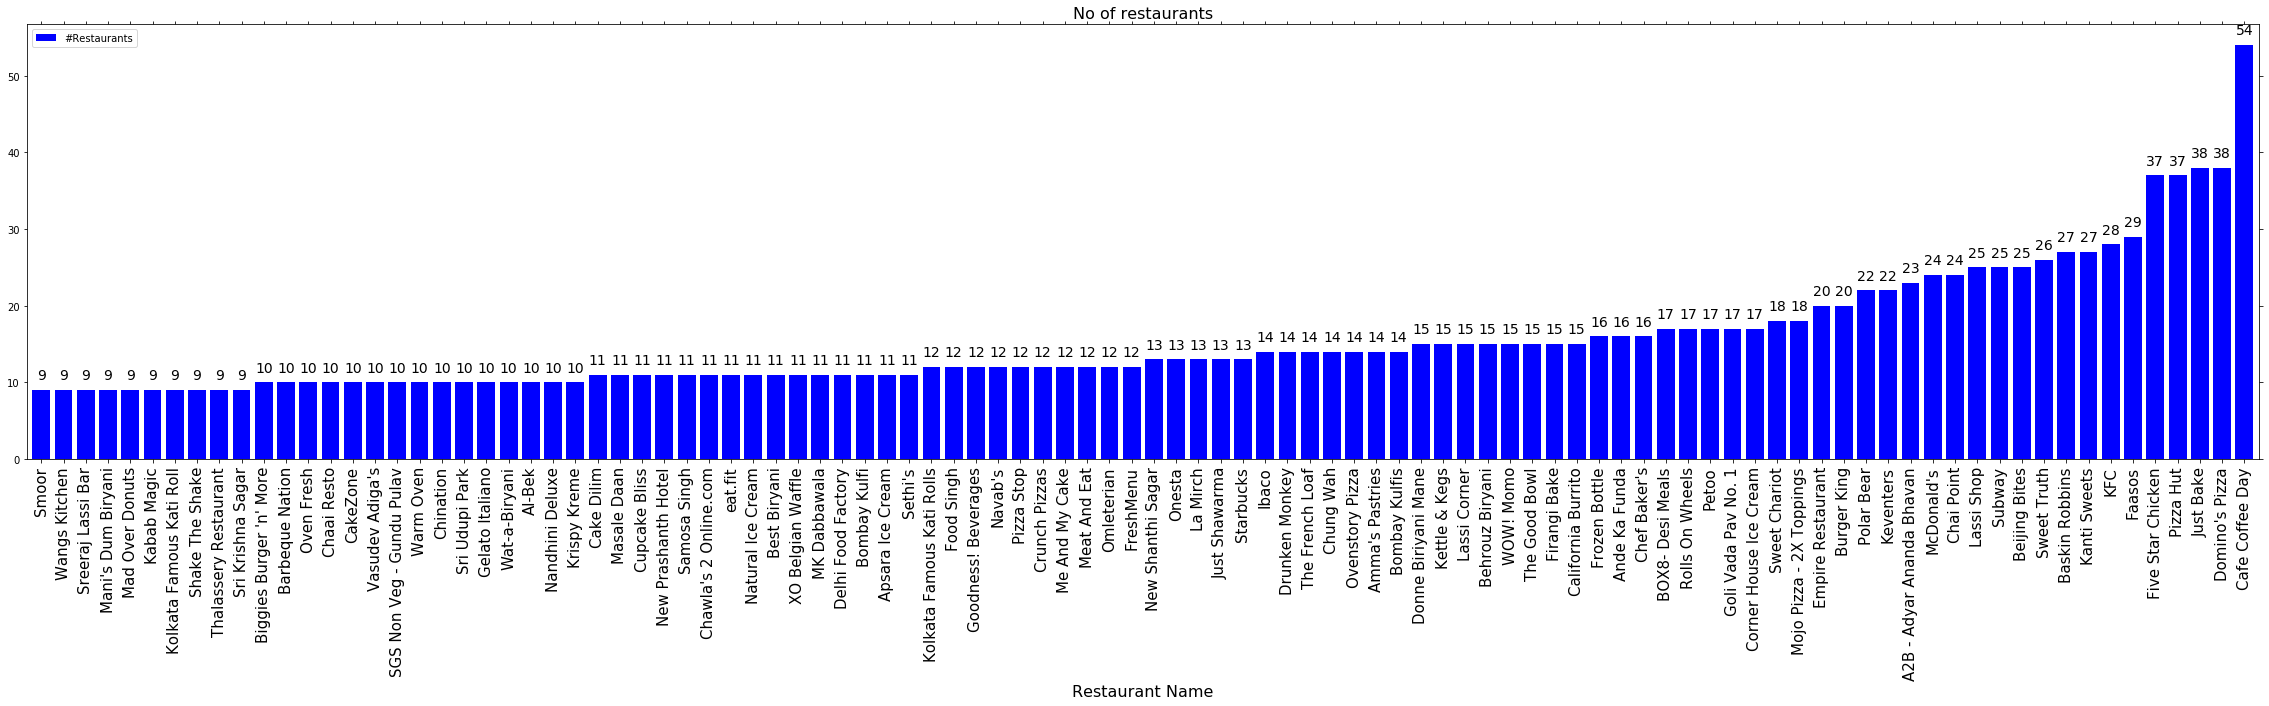

In [63]:
ax = histo.plot(kind='bar', figsize=(40, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom', fontsize=14)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of restaurants', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Restaurant Name', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#Restaurants'])

### Word count analysis

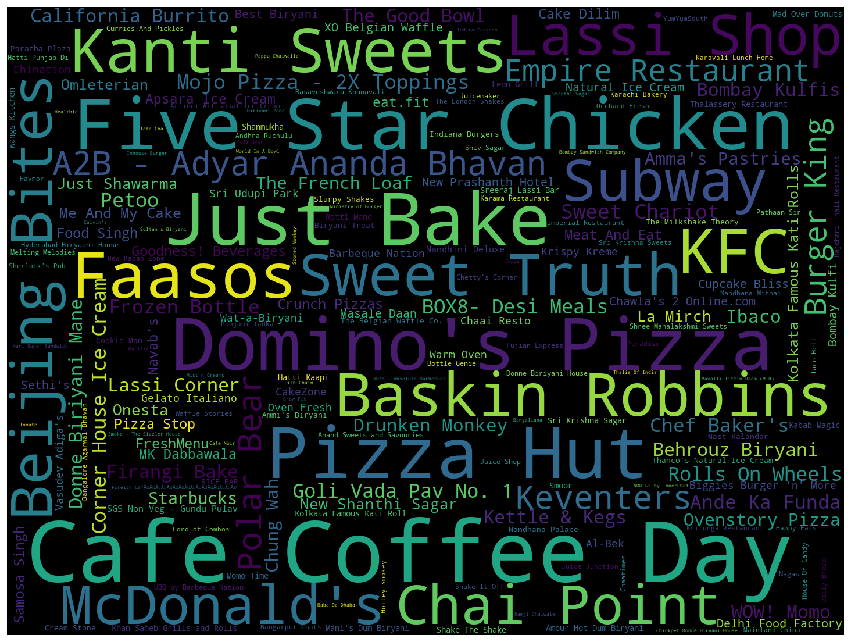

In [64]:
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(cleaned['name'].value_counts()))


fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Caffe coffe Day   >   Dominos Pizza   >   Just Bake (Number of Outlets)

## Online Order and Table Booking Services offered by Resturants 

#### We can see that more only around 10% of resturants having table booking options 

#### Whereas more than 50% resturants have online order service

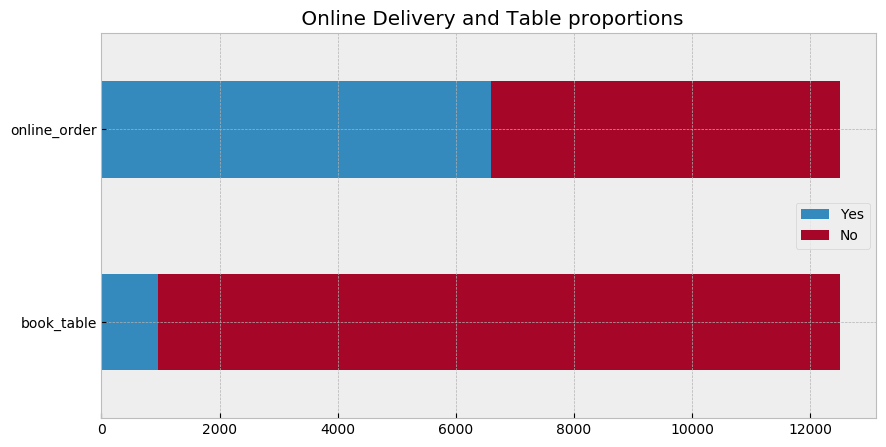

In [65]:
with plt.style.context('bmh', after_reset = True):
    plt.figure(figsize = (10,5))
    ax = plt.subplot(1,1,1)
    tmp = {}
    for col in ['online_order', 'book_table']: 
        tmp[col] = cleaned[col].value_counts()
    tmp = pd.DataFrame.from_dict(tmp, orient = 'index')
    tmp.plot.barh(stacked = True, ax = ax)
    ax.set_title(' Online Delivery and Table proportions')
    plt.show()

In [66]:
# cleaned.loc[cleaned['rate']=="NEW", 'rate'] = np.nan
# cleaned.loc[cleaned['rate']=="-", 'rate'] = np.nan

#cleaned['rate'].nunique

In [67]:
# cleaned.loc[cleaned['rate']=="NEW", 'rate'] = np.nan
# cleaned.loc[cleaned['rate']=="-", 'rate'] = np.nan
cleaned['rate'].replace('/5', '', regex=True, inplace=True)
cleaned['rate'].replace('NEW', '2.5', regex=True, inplace=True)
cleaned['rate'].unique()


array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.5', '2.9', '3.5', '',
       '2.6', '3.8 ', '3.4', '4.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.6 ', '4.8', '3.9 ', '3.7 ', '2.9 ', '2.8 ', '4.2 ', '3.5 ',
       '4.1 ', '2.7 ', '3.4 ', '3.3 ', '3.2 ', '4.3 ', '4.9', '2.1',
       '2.0', '4.4 ', '4.5 ', '1.8', '4.0 ', '4.6 ', '3.1 ', '3.0 ',
       '2.6 ', '2.3 ', '2.5 ', '4.7 ', '4.8 ', '4.9 ', '2.4 ', '2.0 '],
      dtype=object)

In [68]:
# cleaned['rate'].replace('', '0', regex=True, inplace=True)
cleaned['rate'].replace('', np.nan, inplace=True)
cleaned.dropna(subset=['rate'], inplace=True)
cleaned['rate'].unique()



array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.5', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.6 ', '4.8', '3.9 ', '3.7 ', '2.9 ', '2.8 ', '4.2 ', '3.5 ',
       '4.1 ', '2.7 ', '3.4 ', '3.3 ', '3.2 ', '4.3 ', '4.9', '2.1',
       '2.0', '4.4 ', '4.5 ', '1.8', '4.0 ', '4.6 ', '3.1 ', '3.0 ',
       '2.6 ', '2.3 ', '2.5 ', '4.7 ', '4.8 ', '4.9 ', '2.4 ', '2.0 '],
      dtype=object)

In [69]:
cleaned['rate'] = cleaned['rate'].astype(float)

### Average rating of all resturants based on location

##### Areas with high ratings are Lavelle Road, Rajarajeshwari Nagar and Church Street
##### Areas with low ratings are GedalahalliJakkur, Nagarbhavi and Uttarahalli

In [70]:
cleaned.groupby(['location'])['rate'].mean().sort_values()[:-1]

location
North Bangalore                  3.083333
West Bangalore                   3.100000
Bommanahalli                     3.136066
Peenya                           3.200000
Rammurthy Nagar                  3.300000
Wilson Garden                    3.302632
Electronic City                  3.318566
Ejipura                          3.327500
Hennur                           3.349057
South Bangalore                  3.355000
Old Madras Road                  3.355556
Thippasandra                     3.364407
Hebbal                           3.380000
Bellandur                        3.392042
Bannerghatta Road                3.398947
Nagarbhavi                       3.400000
East Bangalore                   3.400000
RT Nagar                         3.406977
Varthur Main Road, Whitefield    3.408824
Banaswadi                        3.414744
Magadi Road                      3.418750
Kumaraswamy Layout               3.430000
Nagawara                         3.430769
BTM                      

### Number of Resturants in Top 20 places 

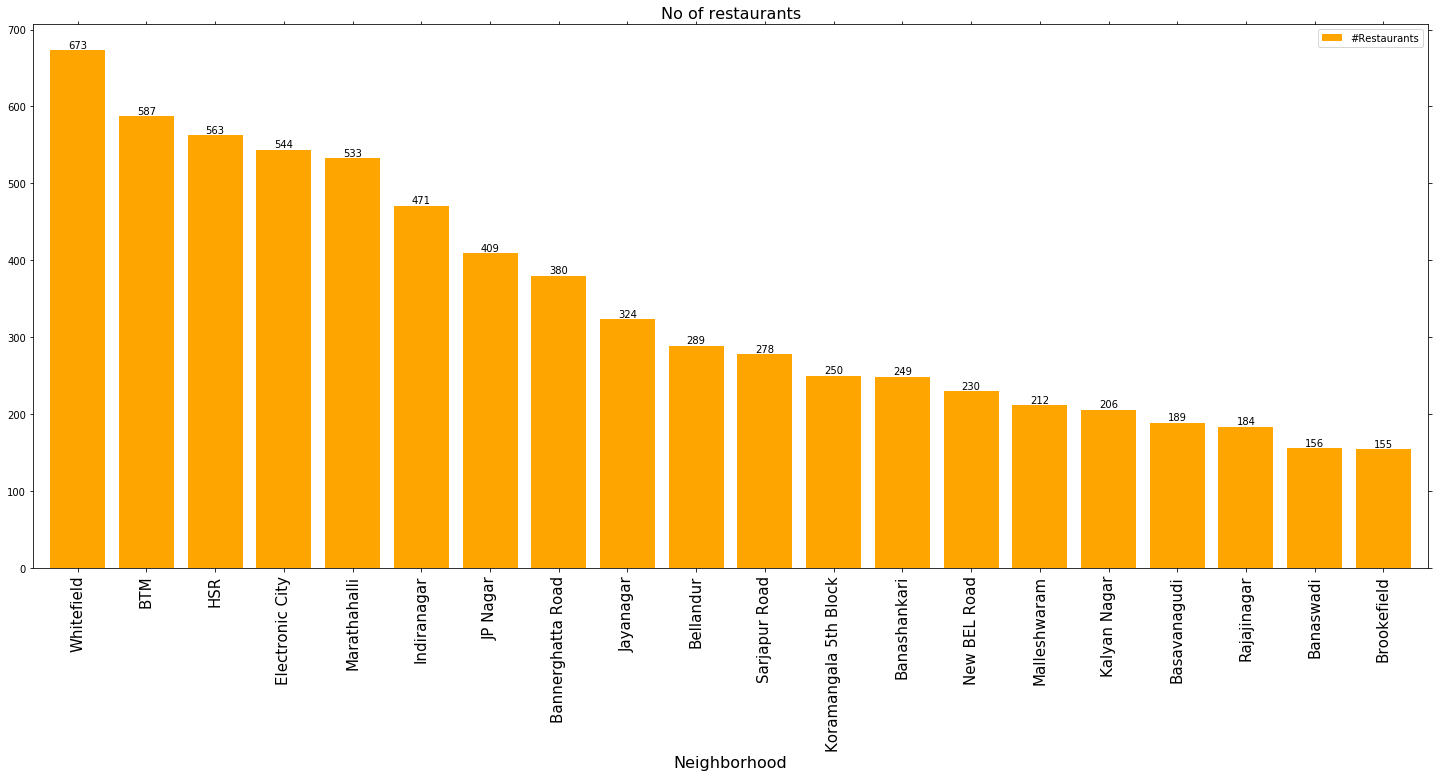

In [71]:
histo = cleaned.groupby('location')['url'].count().sort_values(ascending=False)[:20]
ax = histo.plot(kind='bar', figsize=(25, 10), rot=90, width = 0.8, color=[ 'orange'])
rects = ax.patches
labels = list(histo)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .05, label,
            ha='center', va='bottom', fontsize=10)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of restaurants', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Neighborhood', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#Restaurants'])

### Pricey locations in Bangalore 
#### Lavelle and MG have resturants with high budgets 

In [72]:
cleaned['approx_cost(for two people)'] = cleaned['approx_cost(for two people)'].str.replace(",","").astype(float)

In [73]:
above_50 = cleaned.groupby('location')['url'].count()[cleaned.groupby('location')['url'].count() >= 50].index

In [74]:
cleaned[cleaned['location'].isin(above_50)].groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending= False).head(10)

location
Lavelle Road             1361.320755
MG Road                  1129.545455
Residency Road           1001.351351
Richmond Road             894.927536
Church Street             762.727273
Ulsoor                    732.500000
Old Airport Road          692.000000
Koramangala 4th Block     642.056075
Indiranagar               639.678801
Brigade Road              635.663717
Name: approx_cost(for two people), dtype: float64

### Top 10 areas in Bangalore where maximum number of restaurants are registered on zomato


In [75]:
labels = list(cleaned.location.value_counts().index)
values = list(cleaned.location.value_counts().values)
labels = labels[:10]
values = values[:10]
fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Top 10 areas in Bangalore where maximum number of restaurants are registered on zomato",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Areas",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

### Most Popular Cusines 

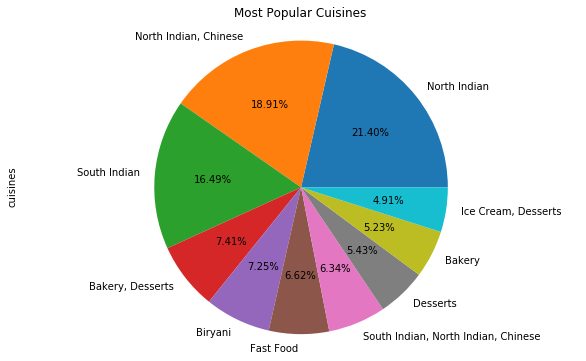

In [76]:
#Top 10 Cuisines served by restaurants
cleaned['cuisines'].value_counts().sort_values(ascending=False).head(10)
cleaned['cuisines'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',figsize=(10,6),
title="Most Popular Cuisines", autopct='%1.2f%%')
plt.axis('equal')
#Number of restaurants in Bangalore with aggregate rating ranging from 1.9 to 4.9
BLR = ['BTM','HSR','Kormangala 5th Block','JP Nagar','Whitefield']
res_BLR = cleaned[(cleaned.location == BLR[0])|(cleaned.location == BLR[1])|(cleaned.location == BLR[2])|
                    (cleaned.location == BLR[3])]

## Based on Cusines 

In [77]:
def fun(x):
    if(type(x) == list):
        return (len(x))
    else:
        return 0
cleaned['no_of_cuisine'] = cleaned['cuisines'].str.split(',').apply(fun)


#### Resturants with more cusines to offer have higher ratings overall

In [78]:
cleaned.groupby(['no_of_cuisine'])['rate'].mean()

no_of_cuisine
1    3.484550
2    3.507259
3    3.539478
4    3.668631
5    3.704348
6    3.807143
7    3.868333
8    3.610000
Name: rate, dtype: float64

# Content based Recommendation

In [79]:
cleaned.dropna()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),no_of_cuisine
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555 +91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,Banashankari,3
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,Banashankari,3
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,Banashankari,3
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet,Banashankari,2
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447 +91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet,Banashankari,2
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002 +91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,"[(Rated 3.0, RATED\n Food 3/5\nAmbience 3/5\n...",[],Buffet,Banashankari,1
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556,080 48653961 080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,"[(Rated 5.0, RATED\n I personally really like...",[],Cafes,Banashankari,3
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0,324,+91 8884135549 +91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,"[(Rated 3.0, RATED\n I had been to this place...",[],Cafes,Banashankari,3
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2,504,+91 9945230807 +91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,"[(Rated 4.0, RATED\n Easy to locate\nVFM 3.5/...",[],Cafes,Banashankari,5
10,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1,402,080 26724489 +91 7406048982,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500.0,"[(Rated 4.0, RATED\n We ended up here on a Sa...",[],Cafes,Banashankari,1


In [80]:
cleaned['location'].value_counts(dropna = False).head(100)

Whitefield               673
BTM                      587
HSR                      563
Electronic City          544
Marathahalli             533
Indiranagar              471
JP Nagar                 409
Bannerghatta Road        380
Jayanagar                324
Bellandur                289
Sarjapur Road            278
Koramangala 5th Block    250
Banashankari             249
New BEL Road             230
Malleshwaram             212
Kalyan Nagar             206
Basavanagudi             189
Rajajinagar              184
Banaswadi                156
Brookefield              155
Frazer Town              148
Koramangala 6th Block    141
Kammanahalli             137
Koramangala 7th Block    132
Koramangala 1st Block    125
Old Airport Road         121
Brigade Road             113
Koramangala 4th Block    107
Ulsoor                   100
Nagawara                  91
                        ... 
Race Course Road          30
Sadashiv Nagar            28
City Market               22
South Bangalor

In [81]:
data_area =cleaned.loc[cleaned['location'] == 'Vijay Nagar']

In [82]:
data_new=data_area[['name','cuisines','location','rate']]
data_new = data_new.dropna()

In [83]:
data_new['location'].value_counts(dropna = False).head(5)

Vijay Nagar           52
Yeshwantpur            0
Jeevan Bhima Nagar     0
Hennur                 0
Hosur Road             0
Name: location, dtype: int64

In [84]:
data_new.loc[cleaned['location'] == 'Vijay Nagar']

,name,cuisines,location,rate
49,Shree Cool Point,"Fast Food, Street Food, Beverages",Vijay Nagar,4.1
78,Kadalu Sea Food Restaurant,"Seafood, North Indian, Chinese, Andhra, Biryan...",Vijay Nagar,3.8
262,Bendakaluru Bytes,Fast Food,Vijay Nagar,3.2
385,Sip n Dine,"North Indian, Chinese, South Indian",Vijay Nagar,3.6
3512,Lassi Corner,"Beverages, Desserts",Vijay Nagar,2.5
11657,Hotel Karavali Food Point,"Mangalorean, South Indian, North Indian",Vijay Nagar,3.8
11658,Sri Ayodhya Veg,"South Indian, North Indian",Vijay Nagar,4.0
11659,Al-Sidique,"North Indian, Chinese",Vijay Nagar,4.0
11660,South Ruchis,"North Indian, South Indian, Chinese",Vijay Nagar,3.9
11663,Mangalore Kitchen,"North Indian, Arabian, Chinese",Vijay Nagar,3.8


In [85]:
data_new = data_new.drop_duplicates(subset=['name'],keep='first')

In [86]:
data_new.shape

(51, 4)

In [87]:
data_new.head()

,name,cuisines,location,rate
49,Shree Cool Point,"Fast Food, Street Food, Beverages",Vijay Nagar,4.1
78,Kadalu Sea Food Restaurant,"Seafood, North Indian, Chinese, Andhra, Biryan...",Vijay Nagar,3.8
262,Bendakaluru Bytes,Fast Food,Vijay Nagar,3.2
385,Sip n Dine,"North Indian, Chinese, South Indian",Vijay Nagar,3.6
3512,Lassi Corner,"Beverages, Desserts",Vijay Nagar,2.5


In [88]:
data_sample=[]

In [89]:
def restaurant_recommend_func(location,title):

    # these variable has to global because of i want use some properties out of function for analysis
    global data_sample
    global cosine_sim
    global sim_scores
    global tfidf_matrix
    global corpus_index
    global feature
    global rest_indices
    global idx

    # When location comes from function ,our new data consist only location dataset
    data_sample = data_new.loc[data_new['location'] == location]

    # index will be reset for cosine similarty index because Cosine similarty index has to be same value with result of tf-idf vectorize
    data_sample.reset_index(level=0, inplace=True)

    #Feature Extraction
    data_sample['Split']='X'
    for i in range(0,data_sample.index[-1]):
        split_data=re.split(r'[,]', data_sample['cuisines'][i])
        for k,l in enumerate(split_data):
            split_data[k]=(split_data[k].replace(" ", ""))
        split_data=' '.join(split_data[:])
        data_sample['Split'].iloc[i]=split_data

    ## --- TF - IDF Vectorizer---  ##
    #Extracting Stopword
    tfidf = TfidfVectorizer(stop_words='english')


    #Replace NaN for empty string
    data_sample['Split'] = data_sample['Split'].fillna('')

    # Applying TF-IDF Vectorizer
    tfidf_matrix = tfidf.fit_transform(data_sample['Split'])
    tfidf_matrix.shape

    # Using for see Cosine Similarty scores
    feature= tfidf.get_feature_names()


    ## ---Cosine Similarity--- ##
    # Compute the cosine similarity matrix
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    # Column names are using for index
    corpus_index=[n for n in data_sample['Split']]

    #Construct a reverse map of indices
    indices = pd.Series(data_sample.index, index=data_sample['name']).drop_duplicates()

    #index of the restaurant matchs the cuisines
    idx = indices[title]


    #Aggregate rating added with cosine score in sim_score list.
    sim_scores=[]
    for i,j in enumerate(cosine_sim[idx]):
        k=data_sample['rate'].iloc[i]
        if j != 0 :
            sim_scores.append((i,j,k))

    #Sort the restaurant names based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: (x[1],x[2]) , reverse=True)

    # 5 similarty cuisines
    sim_scores = sim_scores[0:6]

    rest_indices = [i[0] for i in sim_scores]

    data_x =data_sample[['name','cuisines','rate']].iloc[rest_indices]

    data_x['Cosine Similarity']=0
    for i,j in enumerate(sim_scores):
        data_x['Cosine Similarity'].iloc[i]=round(sim_scores[i][1],2)

    return data_x


In [90]:
# Top 5 similar restaurant with cuisine of 'Srinidhi Sagar' restaurant in Vijay Nagar
restaurant_recommend_func('Vijay Nagar','Srinidhi Sagar')  ## location & Restaurant Name

C:\Users\Vinnu\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,name,cuisines,rate,Cosine Similarity
8,South Ruchis,"North Indian, South Indian, Chinese",3.9,1.0
47,Akshatha Nati Style,"South Indian, Chinese, North Indian",3.7,1.0
3,Sip n Dine,"North Indian, Chinese, South Indian",3.6,1.0
12,Sagar Restaurant & Chats,"South Indian, North Indian, Chinese",3.6,1.0
44,Sagar,"South Indian, North Indian, Chinese",3.6,1.0
20,Srinidhi Sagar,"South Indian, North Indian, Chinese",3.4,1.0


#### Suggest the user based on his choice of cusines in a particular location 
#### Similar Resturants which offer the same cusine choice of the user are recommned 

#### Along with this cosine similarity we come to an conclusion with the metric, for the above output we manually calculated the actual output from the dataset with consideration of above input 

# Regression

######  clean the values of column cost_two_person



In [91]:
def cost_two_person(c):
    cost_edit=c.replace(',','')
    return(cost_edit)

##### method to convert boolean values to 1 , 0

In [92]:
def toggle(x):
    if x=='Yes':
        return 1
    if x=='No':
        return 0

In [93]:
dataframe = cleaned

##### Rename some of the columns to get rid of paranthesis


In [94]:
dataframe=dataframe.rename(columns={"approx_cost(for two people)" : "cost_for_two_people"})
dataframe=dataframe.rename(columns={"listed_in(city)" : "listed_in_city"})
dataframe=dataframe.rename(columns={"listed_in(type)" : "listed_in_type"})
dataframe.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'cost_for_two_people', 'reviews_list', 'menu_item', 'listed_in_type',
       'listed_in_city', 'no_of_cuisine'],
      dtype='object')

######  method to ignore if any denominators and replace nan values with  "-"

In [95]:
def edit(y):
    strg=y.replace('/5','').strip()
    return strg


dataframe['listed_in_type'].unique()
dataframe['rate']=dataframe['rate'].astype('str')
dataframe['rate']=dataframe.rate.apply(edit)
dataframe['rate']=dataframe.rate.apply(lambda x:x.replace('nan',str(np.nan)))
dataframe['rate']=dataframe.rate.apply(lambda x:x.replace('-',str(np.nan)))
dataframe['rate']=dataframe.rate.astype('float')
dataframe['rate'].unique()


array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.5, 2.9, 3.5, 2.6, 3.4, 4.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [96]:
dataframe['rate']
dataframe.dtypes
dataframe.isnull().sum()
dataframe.dropna(subset=['rate','cost_for_two_people'],inplace=True)

##### conversion of data type

In [97]:
type_of_restaurant=dataframe['rest_type'].unique()
temp_restaurant={}

In [98]:
r=0
while r < len(type_of_restaurant):
       temp_restaurant[type_of_restaurant[r]]=r
       r=r+1

In [99]:
dataframe['rest_types']=dataframe.rest_type.map(temp_restaurant).astype('int')

In [100]:
dishes_liked=dataframe['dish_liked'].unique()
temp_dish={}

In [101]:
d=0
while d < len(dishes_liked):
      temp_dish[dishes_liked[d]]=d
      d=d+1


In [102]:
dataframe['dish_liked']=dataframe.dish_liked.map(temp_dish).astype('int')
dataframe['dish_liked']

0           0
1           1
2           2
3           3
4           4
5           5
6           6
7           7
8           8
9           9
10         10
11         11
12         12
13         13
14         14
15         15
16         16
17         17
18          6
19         18
20         19
21          6
22         20
23          6
24          6
25          6
26          6
27          6
28         21
29         22
         ... 
12448       6
12457    4254
12458    4255
12459       6
12460    4256
12461       6
12462      33
12463       6
12464       6
12465       6
12467       6
12468       6
12469       6
12471       6
12472       6
12473       6
12478       6
12480       6
12482       6
12485       6
12487       6
12488    4257
12489    4258
12490       6
12491    4259
12492       6
12493    4260
12495    4261
12496       6
12497    4262
Name: dish_liked, Length: 10055, dtype: int32

In [103]:
dataframe['cost_for_two_people'].unique()
dataframe['cost_for_two_people']=dataframe.cost_for_two_people.astype('str')

In [104]:
dataframe['cost_for_two_people']=dataframe.cost_for_two_people.apply(cost_two_person).astype('float')
dataframe['cost_for_two_people'].isna().sum()

0

In [105]:
dataframe['listed_in_city']
list_of_cities=dataframe['listed_in_city'].unique()
temp_city={}

In [106]:
c=0
while c < len(list_of_cities):
      temp_city[list_of_cities[c]]=c
      c=c+1  

In [107]:
dataframe['location']=dataframe.listed_in_city.map(temp_city).astype('int')  

In [108]:
dataframe['location']
dataframe['online_order'].unique()

[Yes, No]
Categories (2, object): [Yes, No]

In [109]:
dataframe['online_order']=dataframe.online_order.apply(toggle).astype('int')   
dataframe['book_table'].unique()

[Yes, No]
Categories (2, object): [Yes, No]

In [110]:
restaurant_types=dataframe['listed_in_type'].unique()
temp_rest={}

In [111]:
tr=0
while tr < len(restaurant_types):
      temp_rest[restaurant_types[tr]]=tr
      tr=tr+1

In [112]:
dataframe['listed_in_type']=dataframe.listed_in_type.map(temp_rest)    
dataframe['listed_in_type'] 

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
12448    4
12457    4
12458    4
12459    4
12460    4
12461    4
12462    4
12463    4
12464    4
12465    4
12467    4
12468    4
12469    4
12471    4
12472    4
12473    4
12478    4
12480    4
12482    4
12485    4
12487    4
12488    4
12489    4
12490    4
12491    4
12492    4
12493    4
12495    4
12496    4
12497    5
Name: listed_in_type, Length: 10055, dtype: int64

###### variables used for x and y test 

In [113]:
variable_x=dataframe[['cost_for_two_people' , 'location']]
variable_x1=dataframe[['cost_for_two_people']]
var3=dataframe[['cost_for_two_people','book_table']]
var4=dataframe[['cost_for_two_people','listed_in_type']]
var5=dataframe[['location', 'dish_liked']]

In [114]:
variable_y=dataframe['rate']

### Simple Linear Regression

######  Simple Linear Regression : co-efficient and Intercept  for average cost of two people and location vs ratings

In [115]:
var_x_df,var_x_test,var_y_df,var_y_test=train_test_split(variable_x,variable_y,test_size=0.3,random_state=10)
lr1=LinearRegression()
lr1.fit(var_x_df,var_y_df)
predictn1=lr1.predict(var_x_test)
predictn1[2]
var_y_test.iloc[2]

4.0

In [116]:
print("Coefficient: ",lr1.coef_)
print("Intercept: ",lr1.intercept_)

Coefficient:  [ 0.00040179 -0.00065384]
Intercept:  3.33435630377798


######  Simple Linear Regression : co-efficient and Intercept  for average cost of two people and listed in type vs ratings

In [117]:
var_x3_df,var_x3_test,var_y3_df,var_y3_test=train_test_split(var4,variable_y,test_size=0.3,random_state=10)
lr3=LinearRegression()
lr3.fit(var_x3_df,var_y3_df)
predictn2=lr3.predict(var_x3_test)
print("Coefficient: ",lr3.coef_)
print("Intercept: ",lr3.intercept_)

Coefficient:  [ 0.00040118 -0.0351103 ]
Intercept:  3.408811075511818


######  Simple Linear Regression : co-efficient and Intercept  forlocation , dish liked vs ratings


In [118]:
var_x4_df,var_x4_test,var_y4_df,var_y4_test=train_test_split(var5,variable_y,test_size=0.3,random_state=10)
lr4=LinearRegression()
lr4.fit(var_x4_df,var_y4_df)
predictn3=lr4.predict(var_x4_test)
print("Coefficient: ",lr4.coef_)
print("Intercept: ",lr4.intercept_)

Coefficient:  [-0.0095453   0.00018372]
Intercept:  3.4628463713951767


######  ols : summary for average cost of two people and location vs ratings

In [119]:
model=sm.OLS(variable_x1 , variable_y).fit()
pr2=model.predict(variable_x1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     cost_for_two_people   R-squared:                       0.644
Model:                             OLS   Adj. R-squared:                  0.644
Method:                  Least Squares   F-statistic:                 1.821e+04
Date:                 Thu, 16 Apr 2020   Prob (F-statistic):               0.00
Time:                         22:02:57   Log-Likelihood:                -74516.
No. Observations:                10055   AIC:                         1.490e+05
Df Residuals:                    10054   BIC:                         1.490e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rate         150.5750      1.116    134.937      0.000     148.388     152.762
==============================================================================
Omnibus:                     7201.306   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153698.624
Skew:                           3.218   Prob(JB):                         0.00
Kurtosis:                      21.040   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Random Forest

######  Random Forest Regression and root mean square errror : for average cost of two people and location vs ratings

In [120]:
randreg= RandomForestRegressor()
randreg.fit(variable_x,variable_y)
rpred=randreg.predict(variable_x)
print(rpred)

[3.74602074 3.74602074 3.74602074 ... 4.12928571 3.71077943 3.42418853]


C:\Users\Vinnu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [121]:
meanSquaredError= mean_squared_error(variable_y , rpred)
meanSquaredError=np.sqrt(meanSquaredError)
print(meanSquaredError)

0.45782912758113536


######  Random Forest Regression and root mean square errror : for average cost of two people and listed_type vs ratings

In [122]:
randreg2= RandomForestRegressor()
randreg2.fit(var4,variable_y)
rpred2=randreg2.predict(var4)
print(rpred2)
meanSquaredError2= mean_squared_error(variable_y , rpred2)
meanSquaredErro2=np.sqrt(meanSquaredError2)
print(meanSquaredError2)

[3.751689   3.751689   3.751689   ... 4.10302976 3.40478562 3.37813559]
0.22257418435965465


C:\Users\Vinnu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



###### Random Forest Regression and root mean square errror : for location and dish_liked vs ratings

In [123]:
randreg3= RandomForestRegressor()
randreg3.fit(var5,variable_y)
rpred3=randreg3.predict(var5)
print(rpred3)
meanSquaredError3= mean_squared_error(variable_y , rpred3)
meanSquaredErro3=np.sqrt(meanSquaredError3)
print(meanSquaredError3)

[3.98       3.98       3.82666667 ... 3.78       3.331729   3.14      ]
0.11196226012109621


C:\Users\Vinnu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



### Decision Tree

###### Decision Tree : for average cost of two people and location vs ratings

In [124]:
dtr=DecisionTreeRegressor()
dtr.fit(variable_x, variable_y)
dtr_pred=dtr.predict(variable_x)
print(dtr)
print(dtr_pred)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
[3.74782609 3.74782609 3.74782609 ... 4.1        3.71818182 3.46153846]


###### Decision Tree : for average cost of two people and listed in type vs ratings

In [125]:
dtr2=DecisionTreeRegressor()
dtr2.fit(var4, variable_y)
dtr_pred2=dtr2.predict(var4)
print(dtr2)
print(dtr_pred2)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
[3.72692308 3.72692308 3.72692308 ... 4.11875    3.42888889 3.1       ]


###### Decision Tree : for location and dish_liked vs ratings

In [126]:
dtr3=DecisionTreeRegressor()
dtr3.fit(var5, variable_y)
dtr_pred3=dtr2.predict(var5)
print(dtr3)
print(dtr_pred3)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
[3.7        3.7        3.73333333 ... 4.         4.         4.        ]


# Clustering

#### Consider the columns which is required for analysis 


In [127]:
zomato_bang=cleaned[['name','rate','location','rest_type','approx_cost(for two people)','listed_in(type)']]
zomato_bang.head()

,name,rate,location,rest_type,approx_cost(for two people),listed_in(type)
0,Jalsa,4.1,Banashankari,Casual Dining,800.0,Buffet
1,Spice Elephant,4.1,Banashankari,Casual Dining,800.0,Buffet
2,San Churro Cafe,3.8,Banashankari,"Cafe, Casual Dining",800.0,Buffet
3,Addhuri Udupi Bhojana,3.7,Banashankari,Quick Bites,300.0,Buffet
4,Grand Village,3.8,Basavanagudi,Casual Dining,600.0,Buffet


In [128]:
zomato_bang['name'].nunique()
zomato_bang.duplicated().sum()
zomato_bang.columns

Index(['name', 'rate', 'location', 'rest_type', 'approx_cost(for two people)',
       'listed_in(type)'],
      dtype='object')

In [129]:
zomato_bang.isna().sum()

name                            0
rate                            0
location                        0
rest_type                       0
approx_cost(for two people)    33
listed_in(type)                 0
dtype: int64

In [130]:
zomato_bang.name.apply(lambda x: x.title())
zomato_bang.rename(columns={'approx_cost(for two people)': 'average_cost', 'listed_in(type)': 'meal_type'}, inplace=True)
zomato_bang.head()

C:\Users\Vinnu\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,name,rate,location,rest_type,average_cost,meal_type
0,Jalsa,4.1,Banashankari,Casual Dining,800.0,Buffet
1,Spice Elephant,4.1,Banashankari,Casual Dining,800.0,Buffet
2,San Churro Cafe,3.8,Banashankari,"Cafe, Casual Dining",800.0,Buffet
3,Addhuri Udupi Bhojana,3.7,Banashankari,Quick Bites,300.0,Buffet
4,Grand Village,3.8,Basavanagudi,Casual Dining,600.0,Buffet


In [131]:
# Assigning range for the rate column
basket =[0,2,3,4,5]
sticker =['low','moderate','high','exceptional']
zomato_bang['rate_range'] = pd.cut(zomato_bang.rate, bins=basket,labels=sticker)
zomato_bang.head()

C:\Users\Vinnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,name,rate,location,rest_type,average_cost,meal_type,rate_range
0,Jalsa,4.1,Banashankari,Casual Dining,800.0,Buffet,exceptional
1,Spice Elephant,4.1,Banashankari,Casual Dining,800.0,Buffet,exceptional
2,San Churro Cafe,3.8,Banashankari,"Cafe, Casual Dining",800.0,Buffet,high
3,Addhuri Udupi Bhojana,3.7,Banashankari,Quick Bites,300.0,Buffet,high
4,Grand Village,3.8,Basavanagudi,Casual Dining,600.0,Buffet,high


In [132]:
zomato_bang.meal_type.unique()

[Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars]
Categories (7, object): [Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars]

In [133]:
# checking for null values 
for i in zomato_bang.columns:
    print(i,"consists of",zomato_bang[i].isnull().sum(),"nulls")

name consists of 0 nulls
rate consists of 0 nulls
location consists of 0 nulls
rest_type consists of 0 nulls
average_cost consists of 33 nulls
meal_type consists of 0 nulls
rate_range consists of 0 nulls


In [134]:
# Put 0 to the null values in dataset 
zomato_bang.dropna(inplace=True)

C:\Users\Vinnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [135]:
zomato_bang.columns

Index(['name', 'rate', 'location', 'rest_type', 'average_cost', 'meal_type',
       'rate_range'],
      dtype='object')

In [136]:
# Remove restaurant type column 
zomato_bang.drop('rest_type',axis=1,inplace=True)

# Grouping all the types of meals into separate columns 
groups=pd.get_dummies(zomato_bang['meal_type'],prefix='group')

groups.head()

C:\Users\Vinnu\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,group_Buffet,group_Cafes,group_Delivery,group_Desserts,group_Dine-out,group_Drinks & nightlife,group_Pubs and bars
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [137]:
zomato_bang=pd.concat([zomato_bang,groups],axis=1)

zomato_bang.drop('meal_type',axis=1,inplace=True)

zomato_bang.drop_duplicates(inplace=True)

zomato_bang.reset_index(inplace=True)

zomato_bang.drop('index',axis=1,inplace=True)

zomato_bang.head()

,name,rate,location,average_cost,rate_range,group_Buffet,group_Cafes,group_Delivery,group_Desserts,group_Dine-out,group_Drinks & nightlife,group_Pubs and bars
0,Jalsa,4.1,Banashankari,800.0,exceptional,1,0,0,0,0,0,0
1,Spice Elephant,4.1,Banashankari,800.0,exceptional,1,0,0,0,0,0,0
2,San Churro Cafe,3.8,Banashankari,800.0,high,1,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,3.7,Banashankari,300.0,high,1,0,0,0,0,0,0
4,Grand Village,3.8,Basavanagudi,600.0,high,1,0,0,0,0,0,0


### Finding whether rating of the restaurant depends on name of the restaurant ?


#### Yes, It is worth noting that restaurants having more number of cuisines are rated higher

C:\Users\Vinnu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 131 missing from current font.

C:\Users\Vinnu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 130 missing from current font.

C:\Users\Vinnu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 131 missing from current font.

C:\Users\Vinnu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 130 missing from current font.



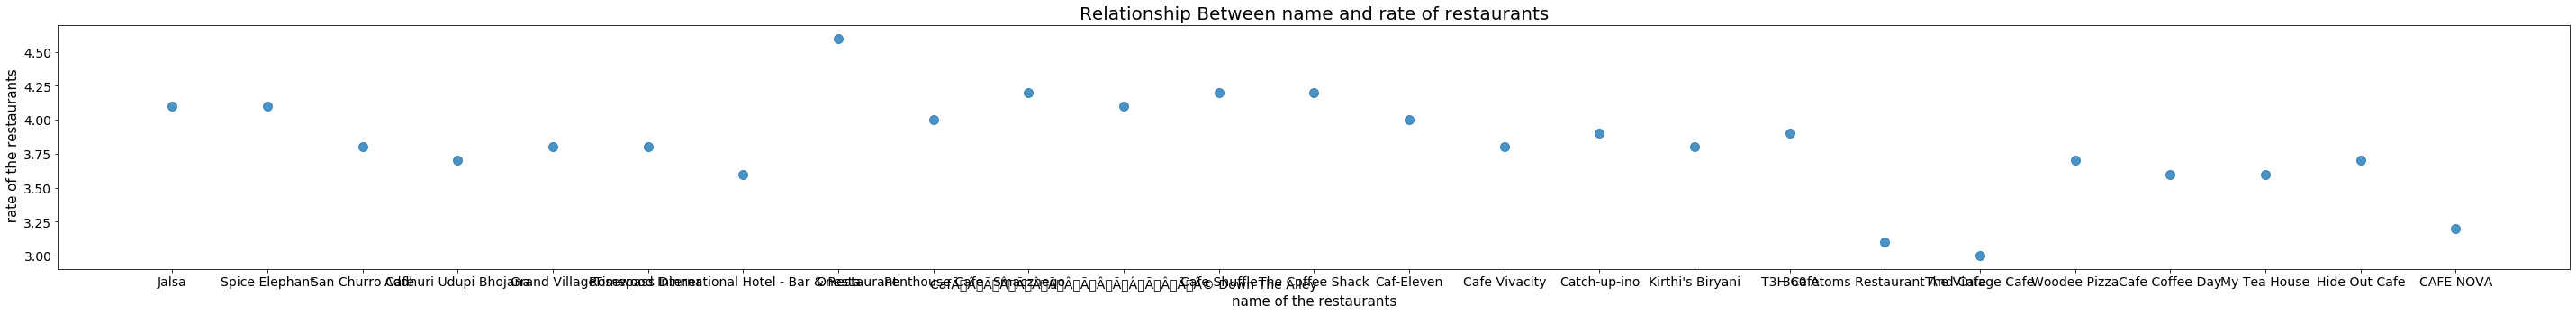

In [138]:
# scatter plot

from matplotlib.pyplot import figure
plt.figure(figsize=(50,5))
plt.scatter(zomato_bang['name'].head(25),zomato_bang['rate'].head(25), s=100 ,alpha=0.8)

# add cluster centroids
# centroids = kmeans.cluster_centers_
# plt.scatter(centroids[:,0], centroids[:,1], c = 'black', marker = '*')
plt.title("Relationship Between name and rate of restaurants",size=20)
plt.xlabel("name of the restaurants",size=15)
plt.ylabel(" rate of the restaurants",size=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

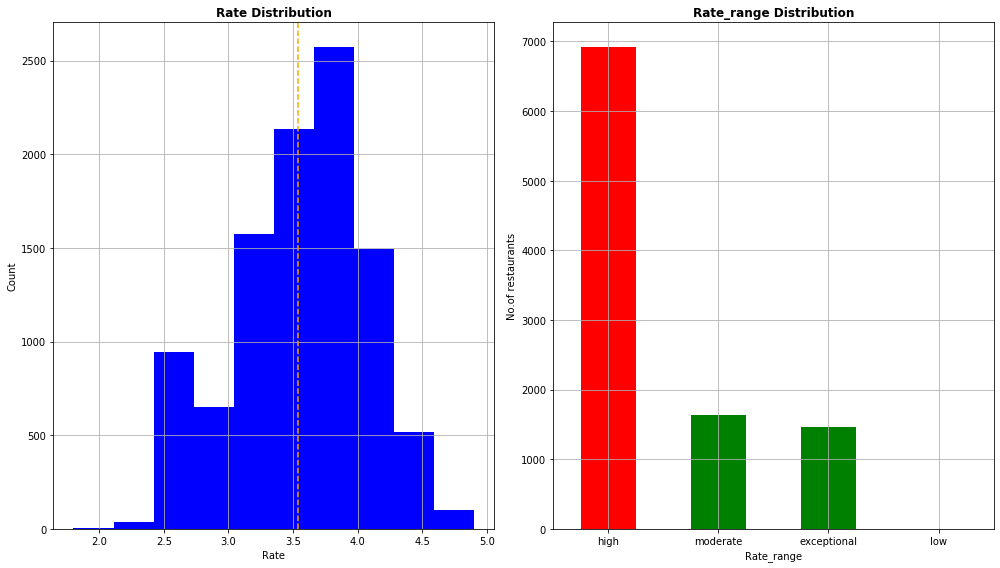

In [139]:
# plot parameters 
shades = ['green' for i in range(zomato_bang.location.nunique())]
shades[0] = 'red'

# histogram for restaurants average_rate
plt.rcParams['figure.figsize'] = 14, 8
plt.subplot(1,2,1)
zomato_bang.rate.hist(color='blue')
plt.axvline(x= zomato_bang.rate.mean(),ls='--',color='orange')
plt.title('Rate Distribution',weight='bold')
plt.xlabel('Rate')
plt.ylabel('Count')

plt.subplot(1,2,2)
zomato_bang.rate_range.value_counts().plot(kind='bar',color=shades,grid=True)
plt.title('Rate_range Distribution',weight='bold')
plt.xlabel('Rate_range')
plt.ylabel('No.of restaurants')
plt.xticks(rotation=0)
plt.tight_layout();

## Feature Matrix and Standardizing

### It is important to first prepare the dataset to perform clustering on it. So, we perform feature matrix, choosing the numerical data types followed by standardizing the features before clustering. We use the StandardScaler method and fit transformation. 

In [140]:
zomato_bang_clu=zomato_bang.drop(['name','location','rate_range'],1)

#1 creating duplicates for standardization purpose and comparing results (feature matrix)
zomato_bang_clu_std=zomato_bang_clu
zomato_bang_clu_copy=zomato_bang_clu

zomato_bang_clu.head()

,rate,average_cost,group_Buffet,group_Cafes,group_Delivery,group_Desserts,group_Dine-out,group_Drinks & nightlife,group_Pubs and bars
0,4.1,800.0,1,0,0,0,0,0,0
1,4.1,800.0,1,0,0,0,0,0,0
2,3.8,800.0,1,0,0,0,0,0,0
3,3.7,300.0,1,0,0,0,0,0,0
4,3.8,600.0,1,0,0,0,0,0,0


In [141]:
# standardize the features before clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

zomato_bang_clu_scaled = scaler.fit_transform(zomato_bang_clu)

zomato_bang_clu_scaled = pd.DataFrame(data = zomato_bang_clu_scaled, columns = zomato_bang_clu.columns)
zomato_bang_clu_scaled.head()

C:\Users\Vinnu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.

C:\Users\Vinnu\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.



,rate,average_cost,group_Buffet,group_Cafes,group_Delivery,group_Desserts,group_Dine-out,group_Drinks & nightlife,group_Pubs and bars
0,1.095176,0.657361,5.733672,-0.234584,-1.521057,-0.211159,-0.460769,-0.026431,-0.039978
1,1.095176,0.657361,5.733672,-0.234584,-1.521057,-0.211159,-0.460769,-0.026431,-0.039978
2,0.507667,0.657361,5.733672,-0.234584,-1.521057,-0.211159,-0.460769,-0.026431,-0.039978
3,0.311830,-0.538233,5.733672,-0.234584,-1.521057,-0.211159,-0.460769,-0.026431,-0.039978
4,0.507667,0.179123,5.733672,-0.234584,-1.521057,-0.211159,-0.460769,-0.026431,-0.039978


## K-means clustering

In [142]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(zomato_bang_clu)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [143]:
flag=kmeans.labels_

zomato_bang_clu['clusters'] = flag

zomato_bang_clu.head()

,rate,average_cost,group_Buffet,group_Cafes,group_Delivery,group_Desserts,group_Dine-out,group_Drinks & nightlife,group_Pubs and bars,clusters
0,4.1,800.0,1,0,0,0,0,0,0,0
1,4.1,800.0,1,0,0,0,0,0,0,0
2,3.8,800.0,1,0,0,0,0,0,0,0
3,3.7,300.0,1,0,0,0,0,0,0,1
4,3.8,600.0,1,0,0,0,0,0,0,0


In [144]:
from sklearn.cluster import KMeans
import numpy as np
kmeans= KMeans()
X = np.random.rand(100, 2)
kmeans.fit(X)
print(kmeans.labels_)

[6 7 1 1 3 3 6 0 0 6 6 2 4 3 5 3 3 7 0 4 5 2 5 0 4 0 3 2 7 7 2 0 0 5 4 0 2
 4 5 7 6 1 4 7 5 5 2 2 4 2 2 3 2 0 7 6 5 3 5 4 1 4 2 1 5 6 4 7 4 3 5 7 7 6
 0 3 2 7 2 0 4 0 1 1 7 7 0 7 2 2 3 0 0 1 3 0 2 7 2 3]


In [145]:
columns = zomato_bang.columns.values.tolist()

columns.extend(['clusters'])

columns

['name',
 'rate',
 'location',
 'average_cost',
 'rate_range',
 'group_Buffet',
 'group_Cafes',
 'group_Delivery',
 'group_Desserts',
 'group_Dine-out',
 'group_Drinks & nightlife',
 'group_Pubs and bars',
 'clusters']

Text(23.608190724206352, 0.5, 'Rating')

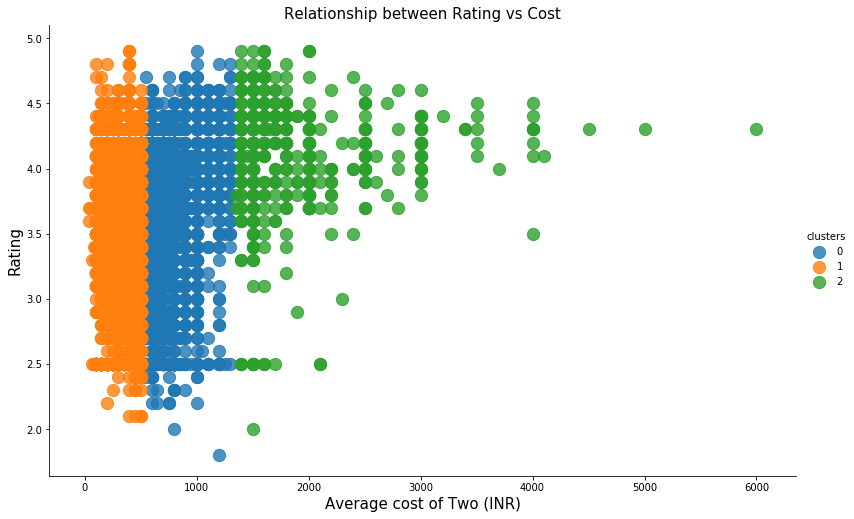

In [146]:
# plotting 

sns.lmplot('average_cost', 'rate', fit_reg = False, hue= "clusters", data = zomato_bang_clu, height=7, aspect=1.6, scatter_kws = {"marker": "D", "s": 150})
plt.title('Relationship between Rating vs Cost', size=15)
plt.xlabel('Average cost of Two (INR)', size=15)
plt.ylabel('Rating', size=15)

## Elbow Method

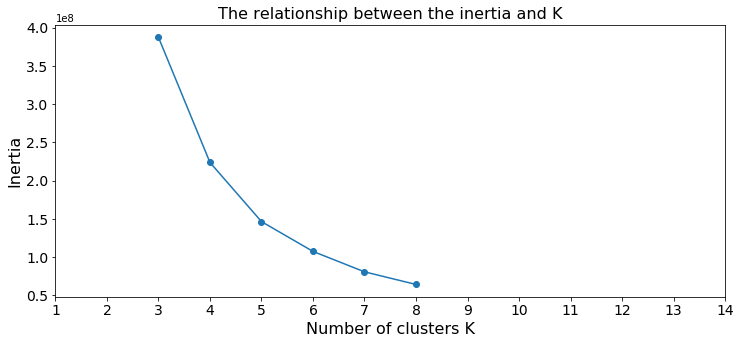

In [147]:
inertia = []

for k in range(3, 9):
    kmeans = KMeans(n_clusters = k, n_init = 30)
    kmeans.fit(zomato_bang_clu)
    inertia.append([k, kmeans.inertia_])
    
plt.figure(figsize = (12,5))
plt.plot(pd.DataFrame(inertia)[0], pd.DataFrame(inertia)[1], marker = 'o')

plt.xlabel('Number of clusters K', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('The relationship between the inertia and K', fontsize = 16)

plt.xticks(np.arange(1,15), fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

###  K = 4 seems to be the "Elbow point" by visual inspection. The best K according to the Elbow Method.

## Silhouette Method

Text(0.5, 1.0, 'The relationship between the Silhouette Score and K')

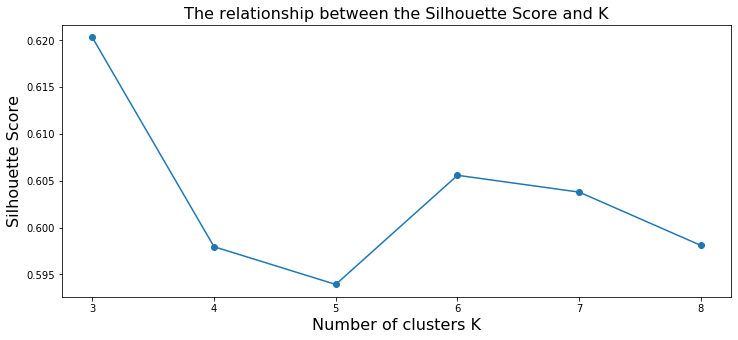

In [148]:
silhouette = []
from sklearn.metrics import silhouette_score


for k in range(3, 9):
    kmeans = KMeans(n_clusters = k, n_init = 30)
    kmeans.fit(zomato_bang_clu)
    silhouette.append([k, silhouette_score(zomato_bang_clu, kmeans.labels_)])
    
plt.figure(figsize = (12,5))
plt.plot(pd.DataFrame(silhouette)[0], pd.DataFrame(silhouette)[1], marker = 'o')

plt.xlabel('Number of clusters K', fontsize = 16)
plt.ylabel('Silhouette Score', fontsize = 16)
plt.title('The relationship between the Silhouette Score and K', fontsize = 16)

# plt.xticks(np.arange(2,12), fontsize = 14)
# plt.yticks(np.arange(0, 0.4, 0.1), fontsize = 14)

# plt.show()

### Based on the above plot, K = 4
### K = 4 corresponds to the highest Silhouette Score.The best K
### K is 4. This result is consistent with the result from the Elbow Methods above 

## Therefore from above, we can say there is some relationship between average cost by two people and rating of the restaurant. Also, we can see that all the higher rated restaurant has higher cost of food too